# 単語ベクトルの読み込み

本章で使用する学習済みの単語ベクトルを，あらかじめ「GoogleNews-vectors-negative300.bin.gz」ファイルから読み込んで置く．

In [2]:
from gensim.models import KeyedVectors

# 「GoogleNews-vectors-negative300.bin.gz」の読み込み
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin.gz'

# 国名に関する単語ベクトルの取得

国名に関するベクトルの取得方法について指摘が無かった．
そのため，今回は「64. アナロジーデータでの実験」で作成したtxtファイルから，国名に関するベクトルを取得することにした．
上記のtxtファイルの作成には時間がかかるため，あらかじめ作成しておいたtxtファイルを使用していく．

In [ ]:
# 重複を許さないためにひとまず集合で初期化
countries = set()
# 「new.txt」を読み取りモードで開く
with open('new.txt', 'r') as f:
    # 行単位で読み取る
    for line in f:
        # 各行を単語に分割
        words = line.split()
        # 国名に関する単語を取得
        if words[0] in ['capital-common-countries', 'capital-world']:
            countries.add(words[2])
        elif words[0] in ['currency', 'gram6-nationality-adjective']:
            countries.add(words[1])

# 集合をリストに変換
countries = list(countries)
# 国名に関する単語から単語ベクトルを取得（リスト内包表記）
vec = [model[country] for country in countries]

# 表示
print(countries)
# print(vec)

['Iraq', 'Kazakhstan', 'Georgia', 'Uruguay', 'Liberia', 'Honduras', 'USA', 'Dominica', 'Canada', 'Ecuador', 'Denmark', 'Belarus', 'Bhutan', 'Cyprus', 'Malta', 'Hungary', 'Syria', 'Portugal', 'Botswana', 'Liechtenstein', 'Malaysia', 'Guyana', 'Suriname', 'Korea', 'Bahamas', 'Turkmenistan', 'Niger', 'Serbia', 'Mozambique', 'Italy', 'Azerbaijan', 'Guinea', 'Samoa', 'Sudan', 'Armenia', 'Ukraine', 'Brazil', 'Switzerland', 'Cuba', 'Macedonia', 'Sweden', 'England', 'Argentina', 'Venezuela', 'Bangladesh', 'Madagascar', 'Zambia', 'Belize', 'Pakistan', 'Chile', 'Montenegro', 'Kyrgyzstan', 'Austria', 'Burundi', 'Greenland', 'Somalia', 'Libya', 'Latvia', 'Thailand', 'France', 'Gambia', 'India', 'Peru', 'Rwanda', 'Qatar', 'Malawi', 'Namibia', 'Ghana', 'Mali', 'Estonia', 'Spain', 'Uzbekistan', 'Colombia', 'Albania', 'Tunisia', 'Slovenia', 'Russia', 'Germany', 'Belgium', 'Lithuania', 'Jordan', 'Vietnam', 'Jamaica', 'Poland', 'Morocco', 'Cambodia', 'Egypt', 'Gabon', 'Angola', 'Oman', 'Taiwan', 'Europe

## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

※1単語当たり次元数が300次元もあり，可視化ができないため，print()で表示する．
「69. t-SNEによる可視化」で改めて次元圧縮した結果を表示する．

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

# 学習
kmeans = KMeans(n_clusters=5).fit(vec)

# 表示
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster: ', i)
    print(', '.join(countries[k] for k in cluster))
    print()

cluster:  0
Iraq, Bhutan, Syria, Malaysia, Bangladesh, Pakistan, Libya, Thailand, India, Qatar, Jordan, Vietnam, Morocco, Cambodia, Egypt, Oman, Taiwan, Afghanistan, Tajikistan, Indonesia, China, Laos, Israel, Bahrain, Nepal, Lebanon, Iran

cluster:  1
Honduras, Dominica, Ecuador, Guyana, Suriname, Bahamas, Samoa, Cuba, Venezuela, Belize, Chile, Peru, Colombia, Jamaica, Nicaragua, Mexico, Philippines, Fiji, Tuvalu

cluster:  2
Kazakhstan, Georgia, Belarus, Cyprus, Malta, Hungary, Turkmenistan, Serbia, Azerbaijan, Armenia, Ukraine, Macedonia, Montenegro, Kyrgyzstan, Latvia, Estonia, Uzbekistan, Albania, Slovenia, Russia, Lithuania, Poland, Slovakia, Croatia, Romania, Bulgaria, Moldova, Turkey, Greece

cluster:  3
Liberia, Botswana, Niger, Mozambique, Guinea, Sudan, Madagascar, Zambia, Burundi, Somalia, Gambia, Rwanda, Malawi, Namibia, Ghana, Mali, Tunisia, Gabon, Angola, Kenya, Uganda, Nigeria, Senegal, Mauritania, Algeria, Eritrea, Zimbabwe

cluster:  4
Uruguay, USA, Canada, Denmark, P

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリングの結果をデンドログラムとして可視化せよ．

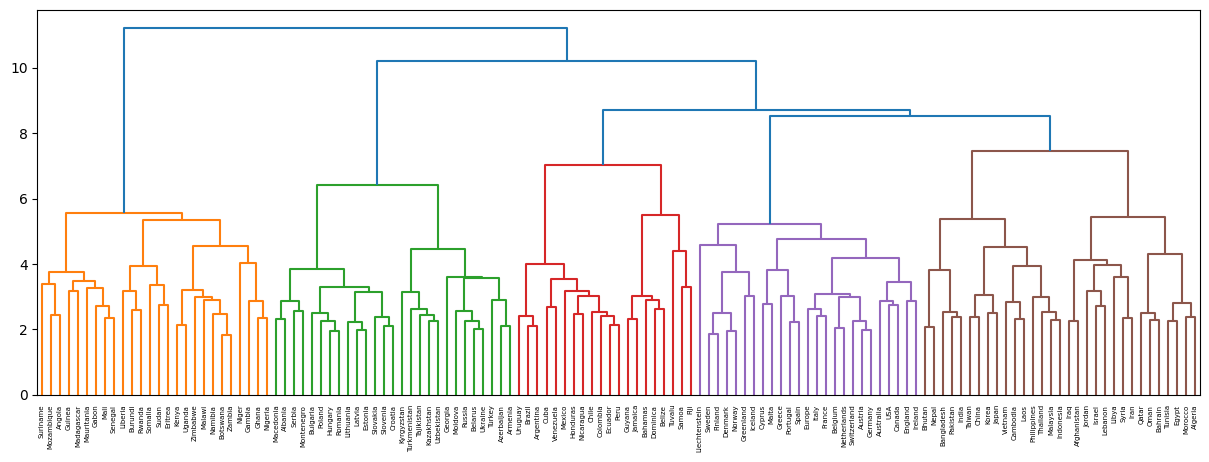

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ward法によるクラスタリング
Z = linkage(vec, method='ward')

# プロット
plt.figure(figsize=(15, 5))
dendrogram(Z, labels=countries) # デンドログラム（樹形図）
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

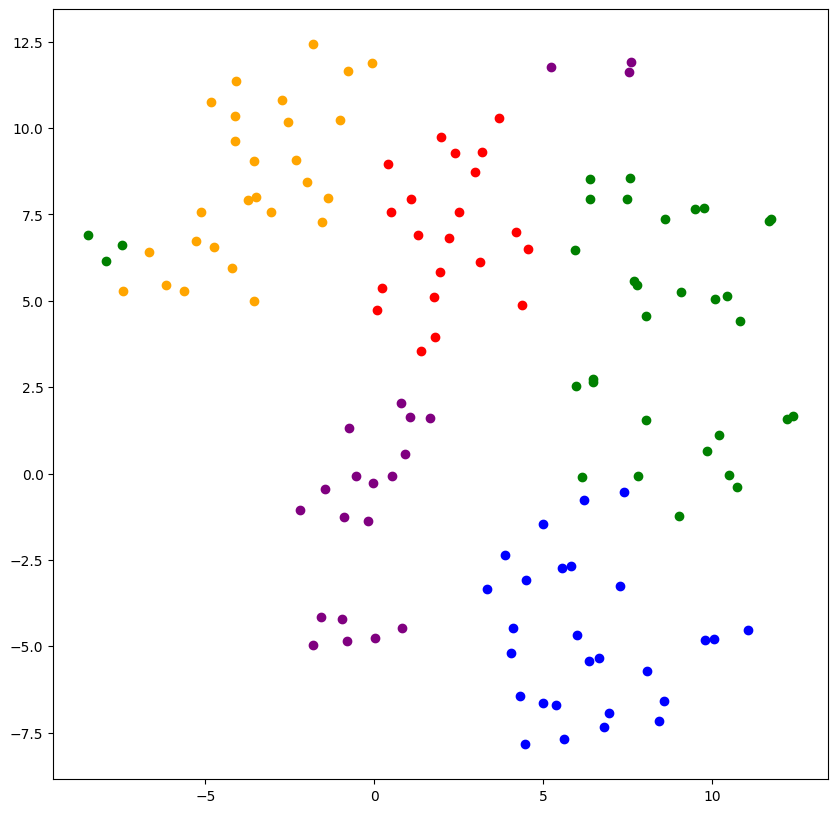

In [ ]:
from sklearn.manifold import TSNE

# t-SNE
embedded = TSNE(n_components=2, random_state=0).fit_transform(np.array(vec))

# プロット
colors = ['blue', 'red', 'green', 'purple', 'orange']
plt.figure(figsize=(10,10))
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    plt.scatter([embedded[j][0] for j in cluster], [embedded[j][1] for j in cluster], color=colors[i])
plt.show